In [1]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
import numpy as np
import math
from keras import layers, optimizers, callbacks, preprocessing, ops
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [2]:
EPOCH = 200

train_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/2classes/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle=True,
    subset='training',
)

val_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/2classes/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle= True,
    subset='validation',
)


test_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/2classes/test',    
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
   batch_size=32, 
    seed=1337,
    image_size=(128, 128),
)

class_names = ['NonDementia', 'VeryMildDementia']
train_data.class_names = class_names
val_data.class_names = class_names




NotFoundError: Could not find directory /Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset copy/train

In [ ]:
model = keras.models.Sequential()
model.add(layers.Input(shape=(128,128,1)))
model.add(layers.RandomFlip(mode='horizontal'))
model.add(layers.RandomZoom(0.05, fill_mode='nearest'))
model.add(layers.RandomRotation(0.05, fill_mode='nearest'))
model.add(layers.RandomTranslation(0.05, 0.05, fill_mode='nearest'))  
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(2, activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,322 (12.60 MB)

 Trainable params: 3,304,322 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = optimizers.Adam(learning_rate=1e-5)

model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'auc', 'f1_score']
)


history = model.fit(train_data, validation_data = val_data, epochs= EPOCH)

Epoch 1/200


2024-05-12 22:52:16.776522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-12 22:52:17.002179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5439 - auc: 0.5646 - f1_score: 0.5296 - loss: 3.1459

2024-05-12 22:52:23.391955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.5442 - auc: 0.5648 - f1_score: 0.5298 - loss: 3.1363 - val_accuracy: 0.6506 - val_auc: 0.7135 - val_f1_score: 0.6163 - val_loss: 0.6687
Epoch 2/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6282 - auc: 0.6704 - f1_score: 0.6115 - loss: 0.7548 - val_accuracy: 0.6644 - val_auc: 0.7251 - val_f1_score: 0.6557 - val_loss: 0.6129
Epoch 3/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6688 - auc: 0.7242 - f1_score: 0.6547 - loss: 0.6178 - val_accuracy: 0.6563 - val_auc: 0.7295 - val_f1_score: 0.6520 - val_loss: 0.6048
Epoch 4/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6778 - auc: 0.7498 - f1_score: 0.6619 - loss: 0.5860 - val_accuracy: 0.6770 - val_auc: 0.7618 - val_f1_score: 0.6511 - val_loss: 0.5727
Epoch 5/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6959 - auc: 0.7658 - f1_score: 0.6817 - loss: 0.5714 - val_accuracy: 0.6874 - val_auc: 0.7646 - val_f1_score: 0.6370 - val_loss:

In [ ]:
evaluate = model.evaluate(test_data)
print(evaluate)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7601 - auc: 0.8329 - f1_score: 0.7582 - loss: 1.0780
[1.021140694618225, 0.7619485259056091, 0.8336763978004456, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.77220756, 0.7507218 ], dtype=float32)>]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


2024-05-12 23:09:29.120939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

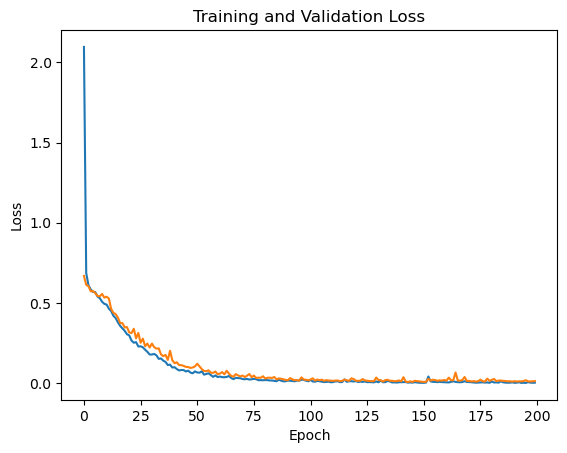

[[439  58]
 [201 390]]


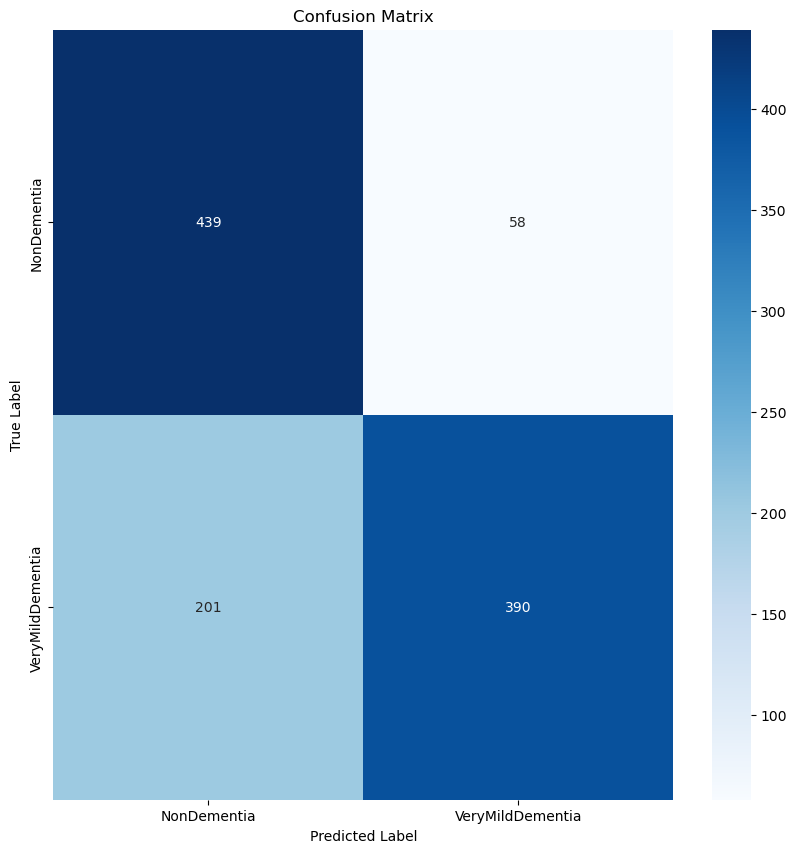

In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_data:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

confusion = confusion_matrix(predictions, labels)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Valadation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()




print(confusion)
plt.figure(figsize=(10,10))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()